In [164]:
from sklearn import datasets

iris_dict = datasets.load_iris(return_X_y=False, as_frame=True)
type(iris_dict)

sklearn.utils._bunch.Bunch

In [165]:
iris_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [166]:
X, y = iris_dict.data, iris_dict.target

print(f'X_shape = {X.shape}, y_shape = {y.shape}')
print(y)

X_shape = (150, 4), y_shape = (150,)
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


In [167]:
print(np.array([iris_dict.target_names[v] for v in y]))

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

In [168]:
import pandas as pd 
import numpy as np

df = pd.DataFrame(
    np.hstack([X,np.array([iris_dict.target_names[v] for v in y]).reshape(-1,1)]),
    columns=(['sepal_width','sepal_height','petal_width','petal_height','species'])
)
df.columns

Index(['sepal_width', 'sepal_height', 'petal_width', 'petal_height',
       'species'],
      dtype='object')

In [169]:
df = df.astype({k:np.float for k in df.columns if k != 'species'})
df

/var/folders/06/gmp4cfpd1kn490jzvs864zh00000gn/T/ipykernel_45579/614214940.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df = df.astype({k:np.float for k in df.columns if k != 'species'})


,sepal_width,sepal_height,petal_width,petal_height,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


/var/folders/06/gmp4cfpd1kn490jzvs864zh00000gn/T/ipykernel_45579/3484786979.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X.iloc[:,i], ax=ax, color=next(colors), kde=True, norm_hist=True, hist=True)
/var/folders/06/gmp4cfpd1kn490jzvs864zh00000gn/T/ipykernel_45579/3484786979.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2

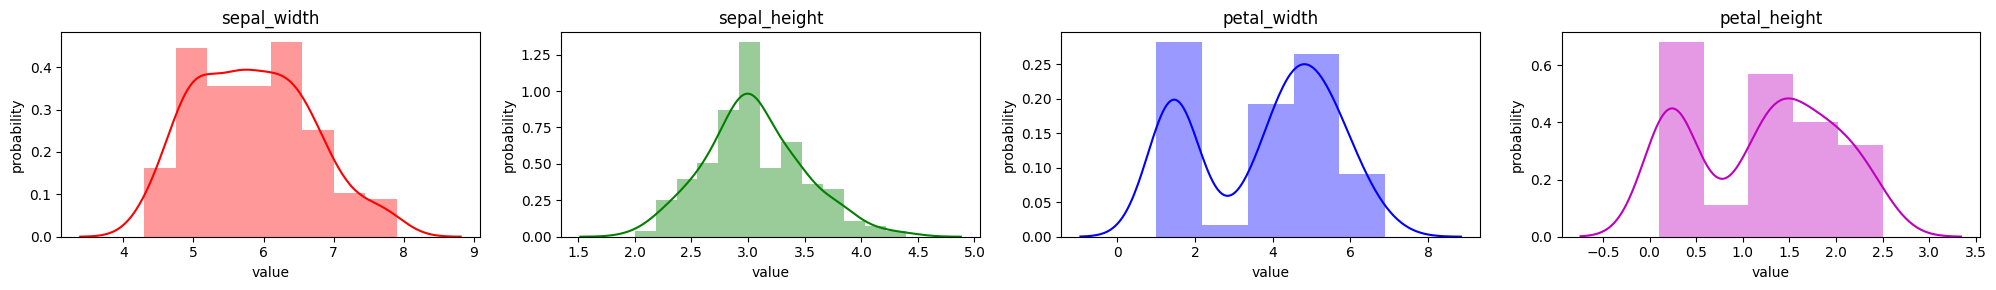

In [170]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle

colors = cycle(['r', 'g', 'b', 'm'])
columns=['sepal_width', 'sepal_height', 'petal_width', 'petal_height']
n_vars = len(columns)

n_cols = 4
n_rows = n_vars / n_cols if n_vars % n_cols == 0 else (n_vars / n_cols) + 1
n_plots = int(n_cols * n_rows)

fig = plt.figure(figsize=(20, 3))

for i in range(n_plots):
    ax = fig.add_subplot(int(n_rows), n_cols, i + 1)

    if i < n_vars:
        sns.distplot(X.iloc[:,i], ax=ax, color=next(colors), kde=True, norm_hist=True, hist=True)
        ax.set_title(columns[i])
        ax.set_xlabel('value')
        ax.set_ylabel('probability')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

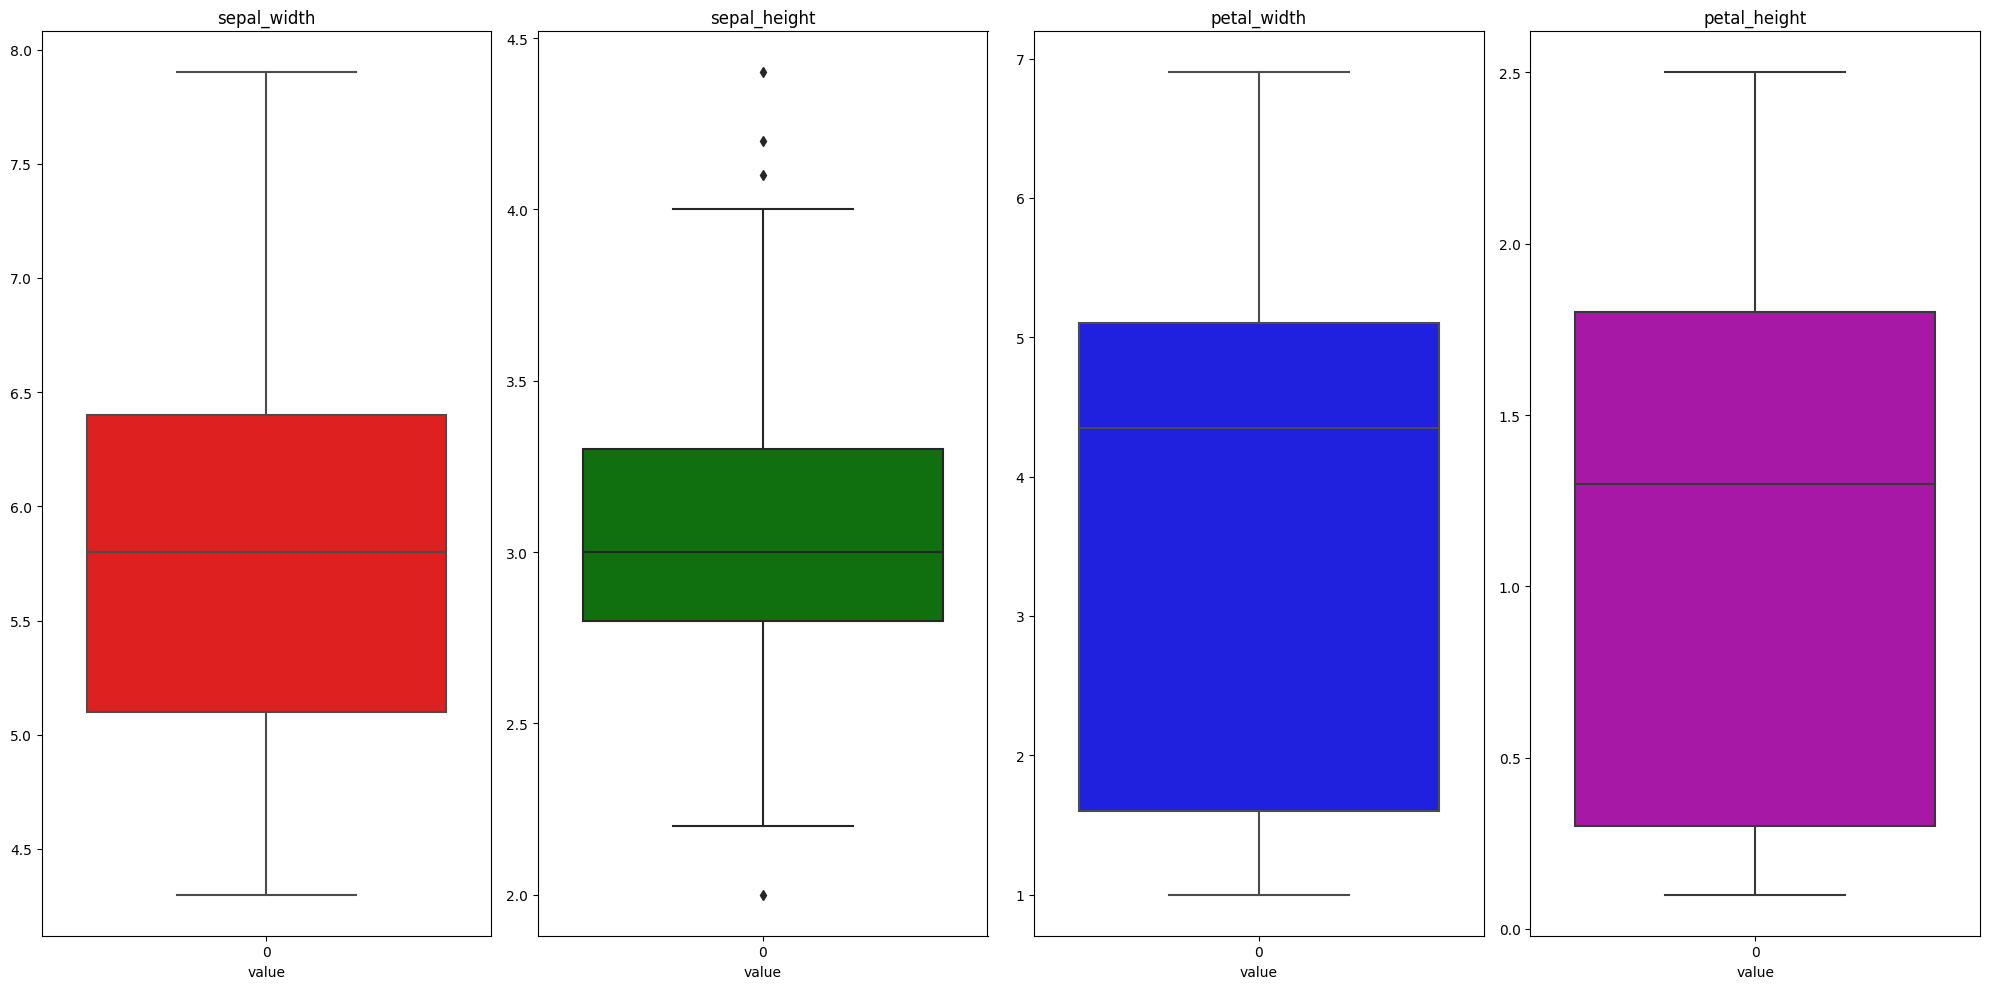

In [171]:
colors = cycle(['r', 'g', 'b', 'm'])
n_cols = 4
n_rows = n_vars / n_cols if n_vars % n_cols == 0 else (n_vars / n_cols) + 1
n_plots = int(n_cols * n_rows)

fig = plt.figure(figsize=(20, 10))

for i in range(n_plots):
    ax = fig.add_subplot(int(n_rows), n_cols, i + 1)

    if i < n_vars:
        sns.boxplot(X.iloc[:,i], ax=ax, color=next(colors))
        ax.set_title(columns[i])
        ax.set_xlabel('value')
    else:
        ax.axis('off')

plt.tight_layout()

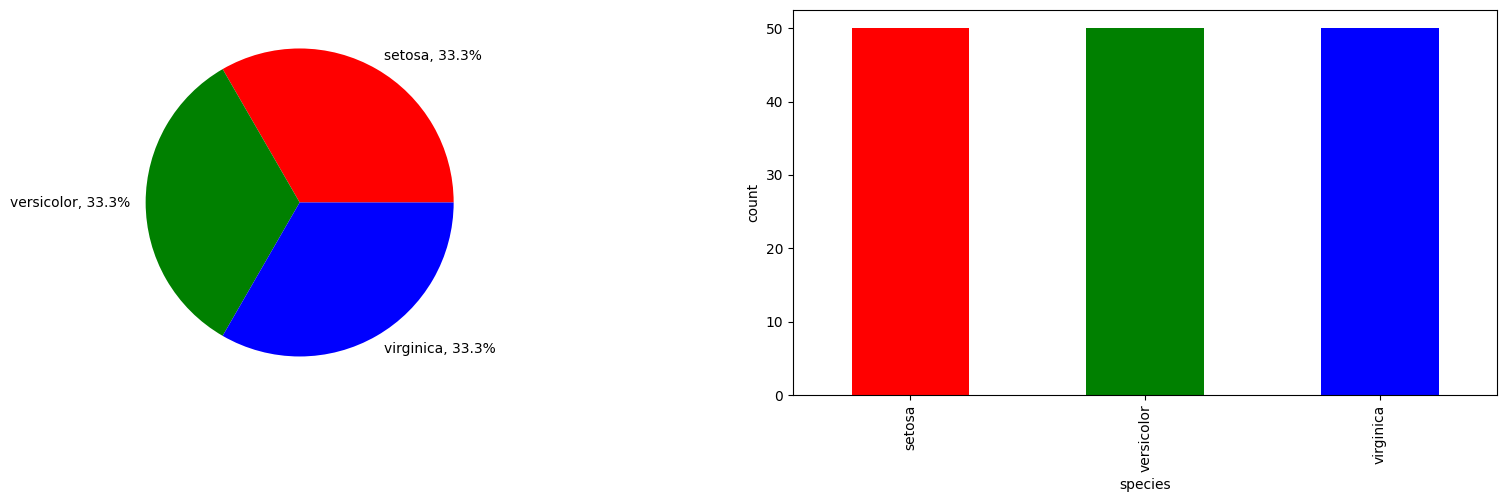

In [172]:
fig , ax = plt.subplots(1,2,figsize=(20,5))

species = df['species'].value_counts()
proportions = species / species.sum()
labels = ['{}, {:.3}%'.format(i,v*100) for i,v in proportions.items()]

species.plot.pie(ax=ax[0], colors=['r','g','b'], labels=labels)
species.plot.bar(ax=ax[1],color=['r','g','b'])

ax[0].set_ylabel('')
ax[1].set_ylabel('count')
ax[1].set_xlabel('species')

# plt.tight_layout()
plt.show()

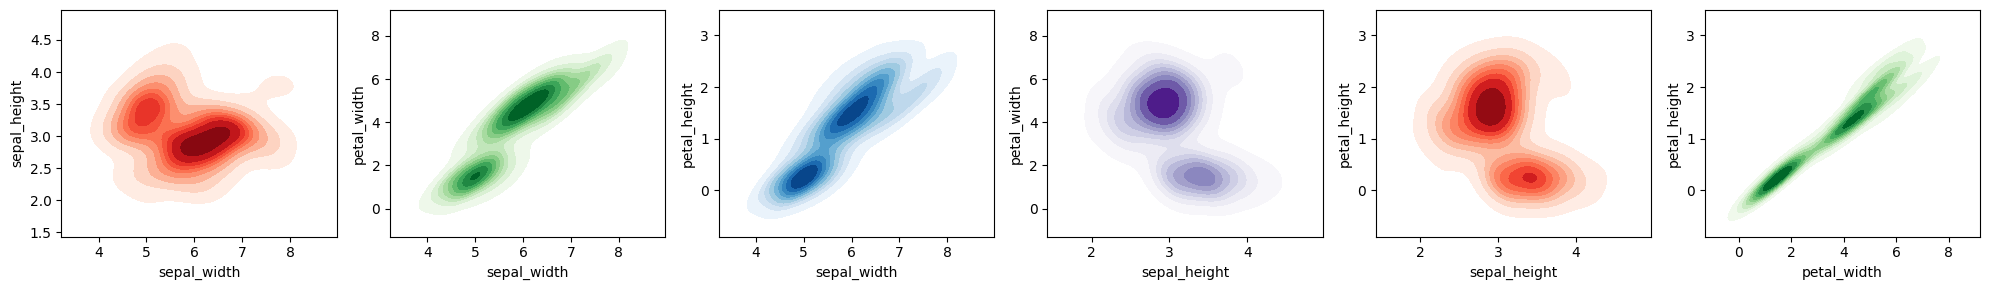

In [173]:
from itertools import combinations

# colors = sns.color_palette('hls', n_colors=6)
colors = cycle(['Reds', 'Greens', 'Blues', 'Purples'])
columns=['sepal_width', 'sepal_height', 'petal_width', 'petal_height']
pairs = [comb for comb in combinations(columns, 2) if comb[0] != comb[1]]
n_pairs = len(pairs)

n_cols = 6
n_rows = n_pairs / n_cols if n_pairs % n_cols == 0 else (n_pairs / n_cols) + 1
n_plots = int(n_cols * n_rows)

fig = plt.figure(figsize=(20, 3))

for i in range(n_plots):
    ax = fig.add_subplot(int(n_rows), n_cols, i + 1)

    if i < n_pairs:
        label_x = pairs[i][0]
        label_y = pairs[i][1]

        x = df[label_x]
        y = df[label_y]
        data = [x, y]
        data = pd.concat(data)
        # g = sns.PairGrid(df, height=2)
        # g(sns.kdeplot)
        sns.kdeplot(data=data, x=x, y=y, fill=True, cmap=next(colors))
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

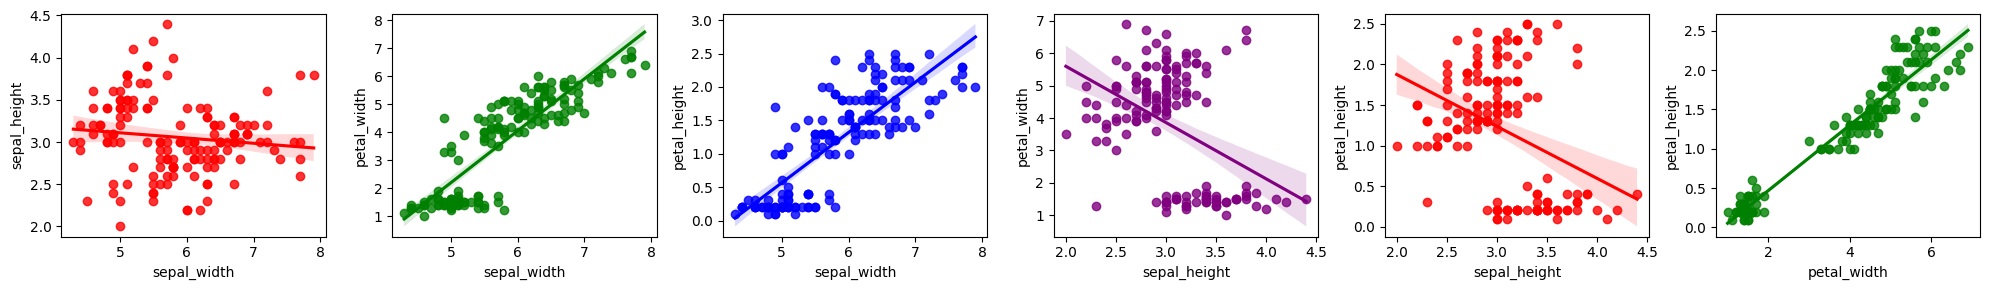

In [180]:
from itertools import combinations

# colors = sns.color_palette('hls', n_colors=6)
colors = cycle(['Red', 'Green', 'Blue', 'Purple'])
columns=['sepal_width', 'sepal_height', 'petal_width', 'petal_height']
pairs = [comb for comb in combinations(columns, 2) if comb[0] != comb[1]]
n_pairs = len(pairs)

n_cols = 6
n_rows = n_pairs / n_cols if n_pairs % n_cols == 0 else (n_pairs / n_cols) + 1
n_plots = int(n_cols * n_rows)

fig = plt.figure(figsize=(20, 3))

for i in range(n_plots):
    ax = fig.add_subplot(int(n_rows), n_cols, i + 1)

    if i < n_pairs:
        label_x = pairs[i][0]
        label_y = pairs[i][1]

        x = df[label_x]
        y = df[label_y]
        data = [x, y]
        data = pd.concat(data)
        # g = sns.PairGrid(df, height=2)
        # g(sns.kdeplot)
        sns.regplot(data=data, x=x, y=y, color=next(colors))
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

[Text(0.5, 0, 'sepal_width'),
 Text(1.5, 0, 'sepal_height'),
 Text(2.5, 0, 'petal_width'),
 Text(3.5, 0, 'petal_height')]

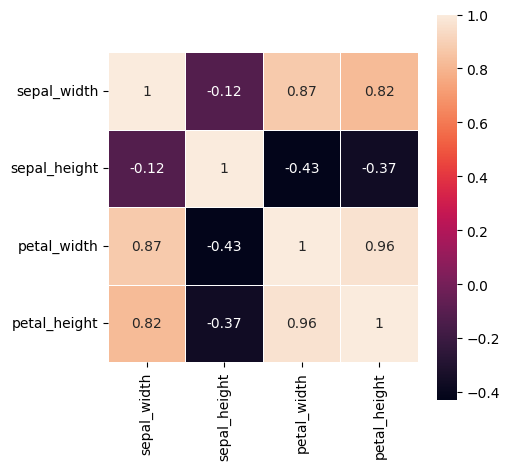

In [185]:
fig, ax = plt.subplots(figsize=(5,5))
g = sns.heatmap(np.corrcoef(X.T), yticklabels=columns, xticklabels=columns, linewidths=0.5, annot=True, square=True, ax=ax, cbar=True)

g.set_yticklabels(g.get_yticklabels(), rotation=0)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

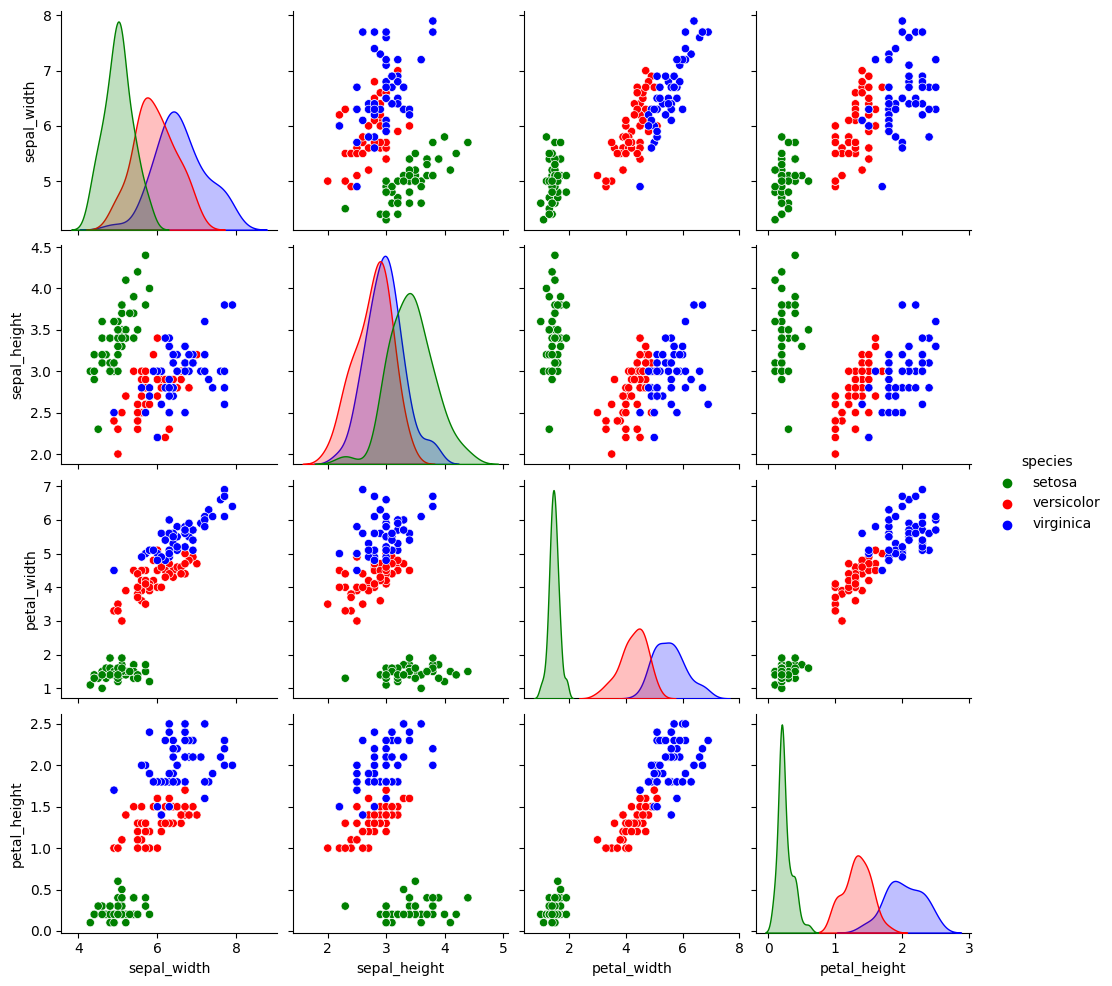

In [190]:
palette = {'setosa':'g','versicolor':'r','virginica':'b'}

sns.pairplot(df, hue='species', palette=palette, diag_kind='kde') 

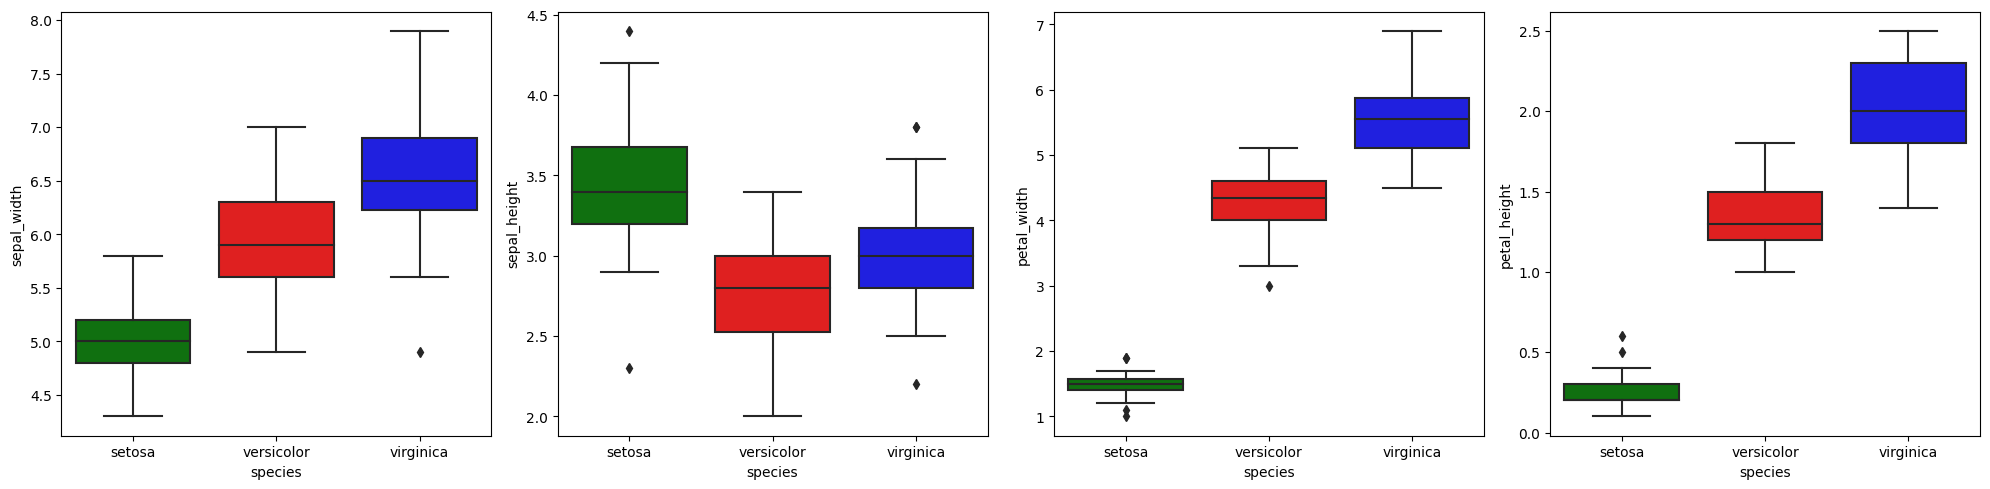

In [195]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
axes = np.ravel(ax)
# print(axis)
palette = {'setosa':'g','versicolor':'r','virginica':'b'}

for a,c in zip(axes, ['sepal_width','sepal_height','petal_width','petal_height']):
    sns.boxplot(x='species', y=c, data=df, palette=palette, ax=a)

plt.tight_layout()

('sepal_width', 'sepal_height', 'petal_width')
('sepal_width', 'sepal_height', 'petal_height')
('sepal_width', 'petal_width', 'petal_height')
('sepal_height', 'petal_width', 'petal_height')


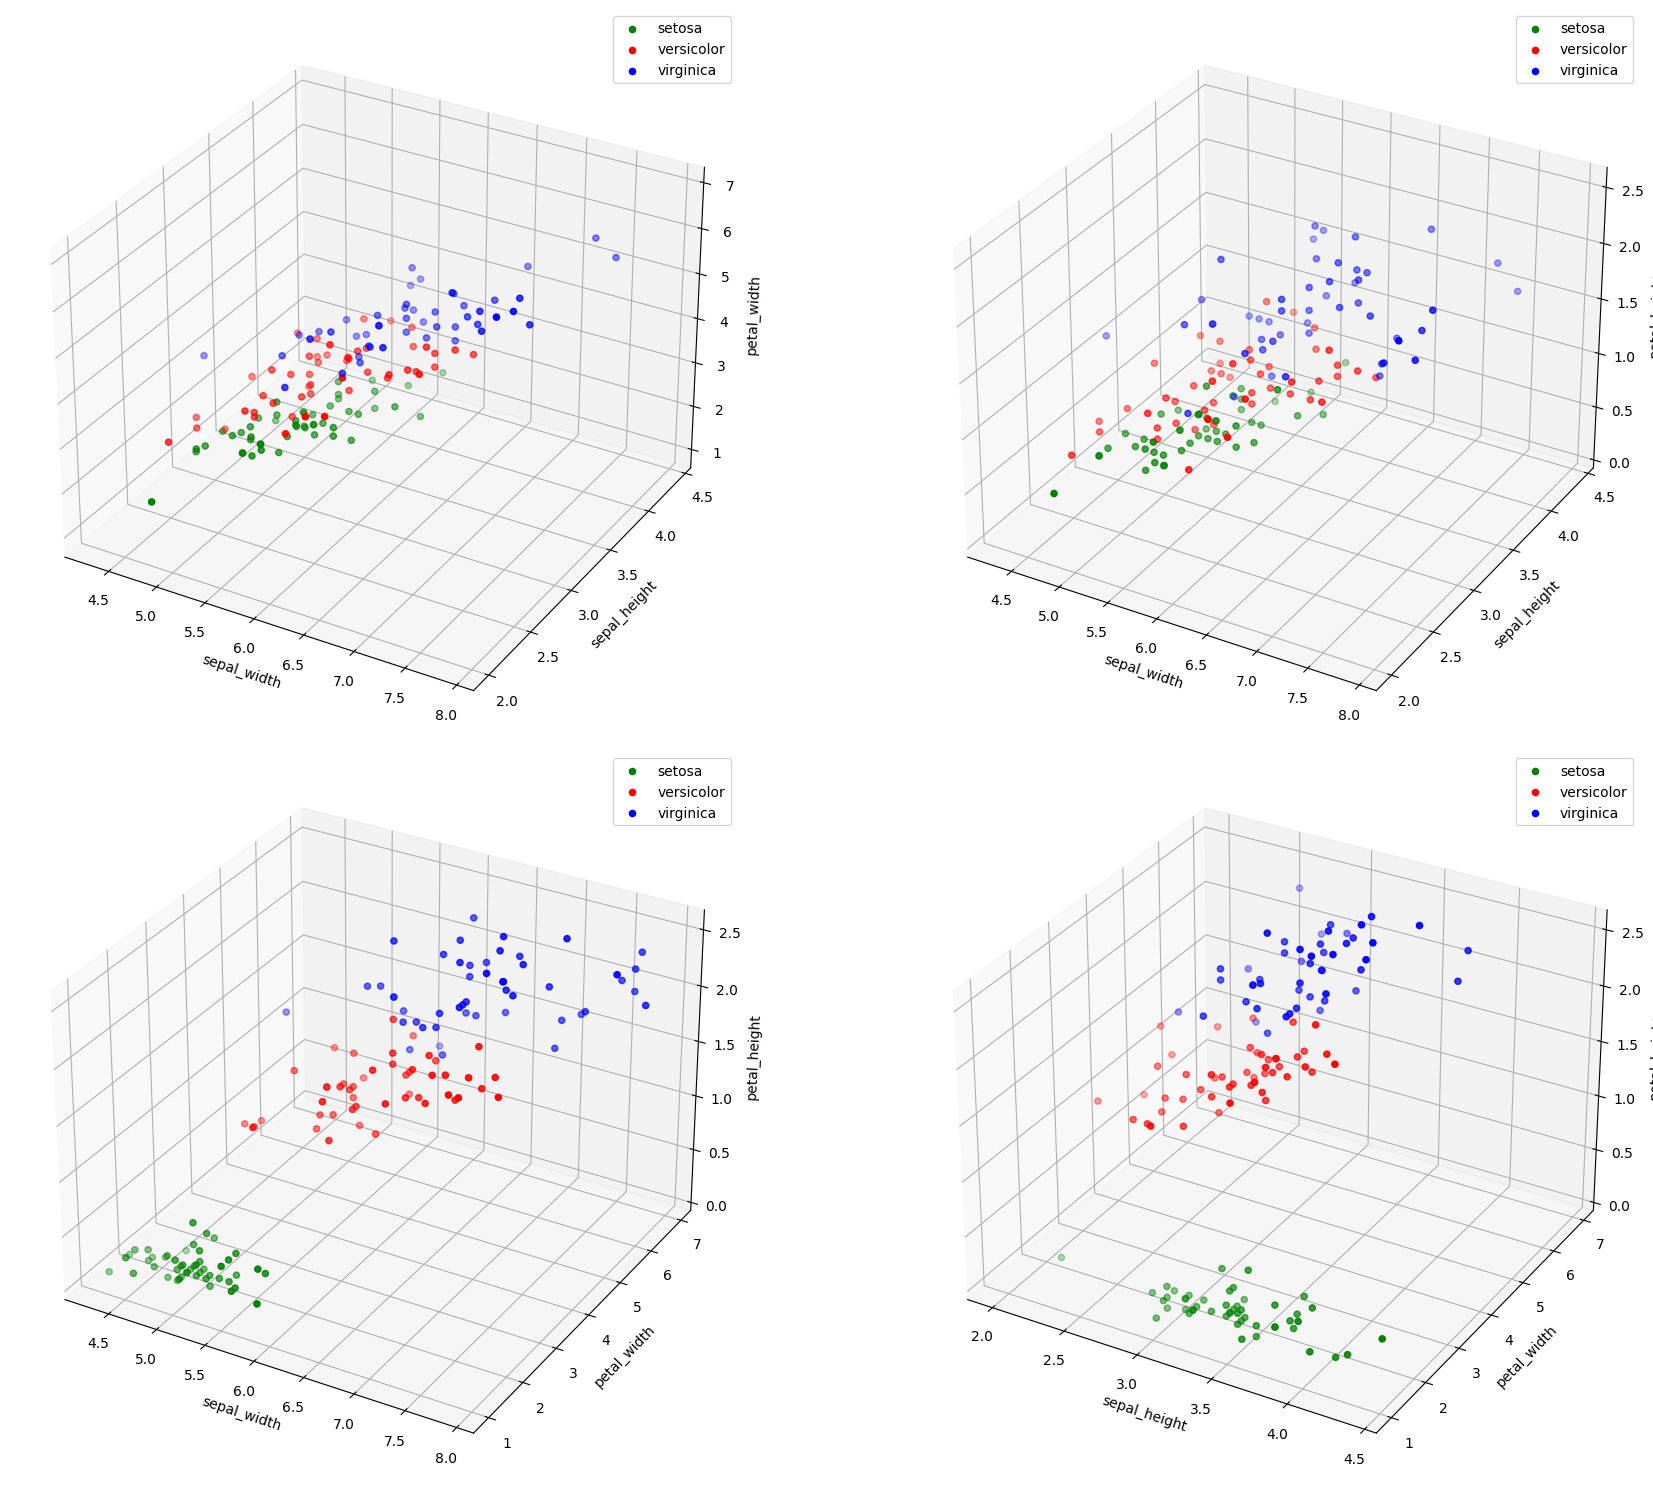

In [200]:
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D

combos = list(combinations(['sepal_width','sepal_height','petal_width','petal_height'],3))
n_combos = len(combos)

for i in combos:
    print(i)

fig = plt.figure(figsize=(20,15))

for i, combo in enumerate(combos):
    ax = fig.add_subplot(2,2,i+1,projection='3d')

    for s, c in palette.items():
        d = df[df['species'] == s]
        x,y,z = d[combo[0]], d[combo[1]], d[combo[2]]
        ax.scatter3D(x,y,z, color=c, label=s)
        ax.set_xlabel(combo[0])
        ax.set_ylabel(combo[1])
        ax.set_zlabel(combo[2])
        ax.legend()

plt.tight_layout()

<AxesSubplot: >

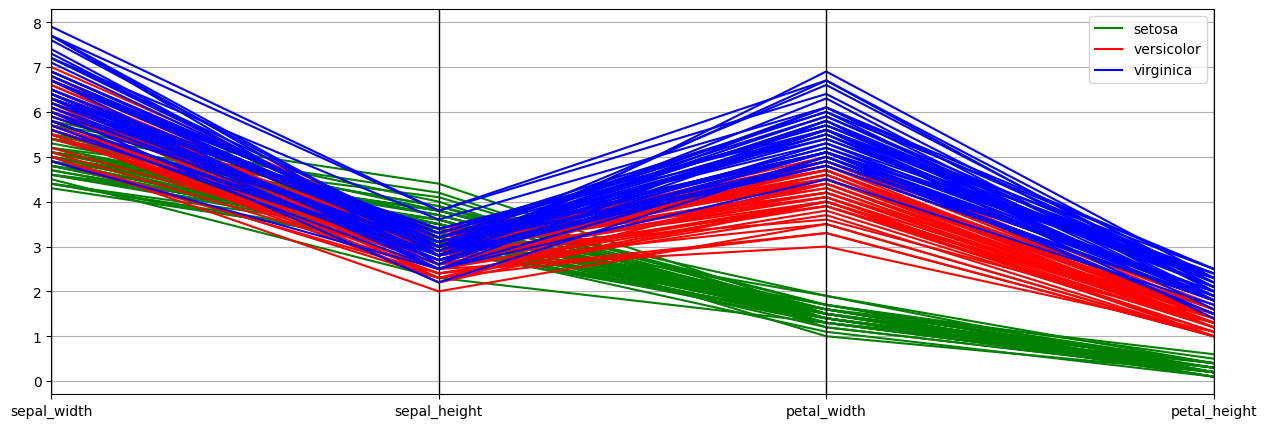

In [201]:
fig, ax = plt.subplots(figsize=(15,5))

pd.plotting.parallel_coordinates(df, 'species', ax=ax, color=['g','r','b'])

<AxesSubplot: >

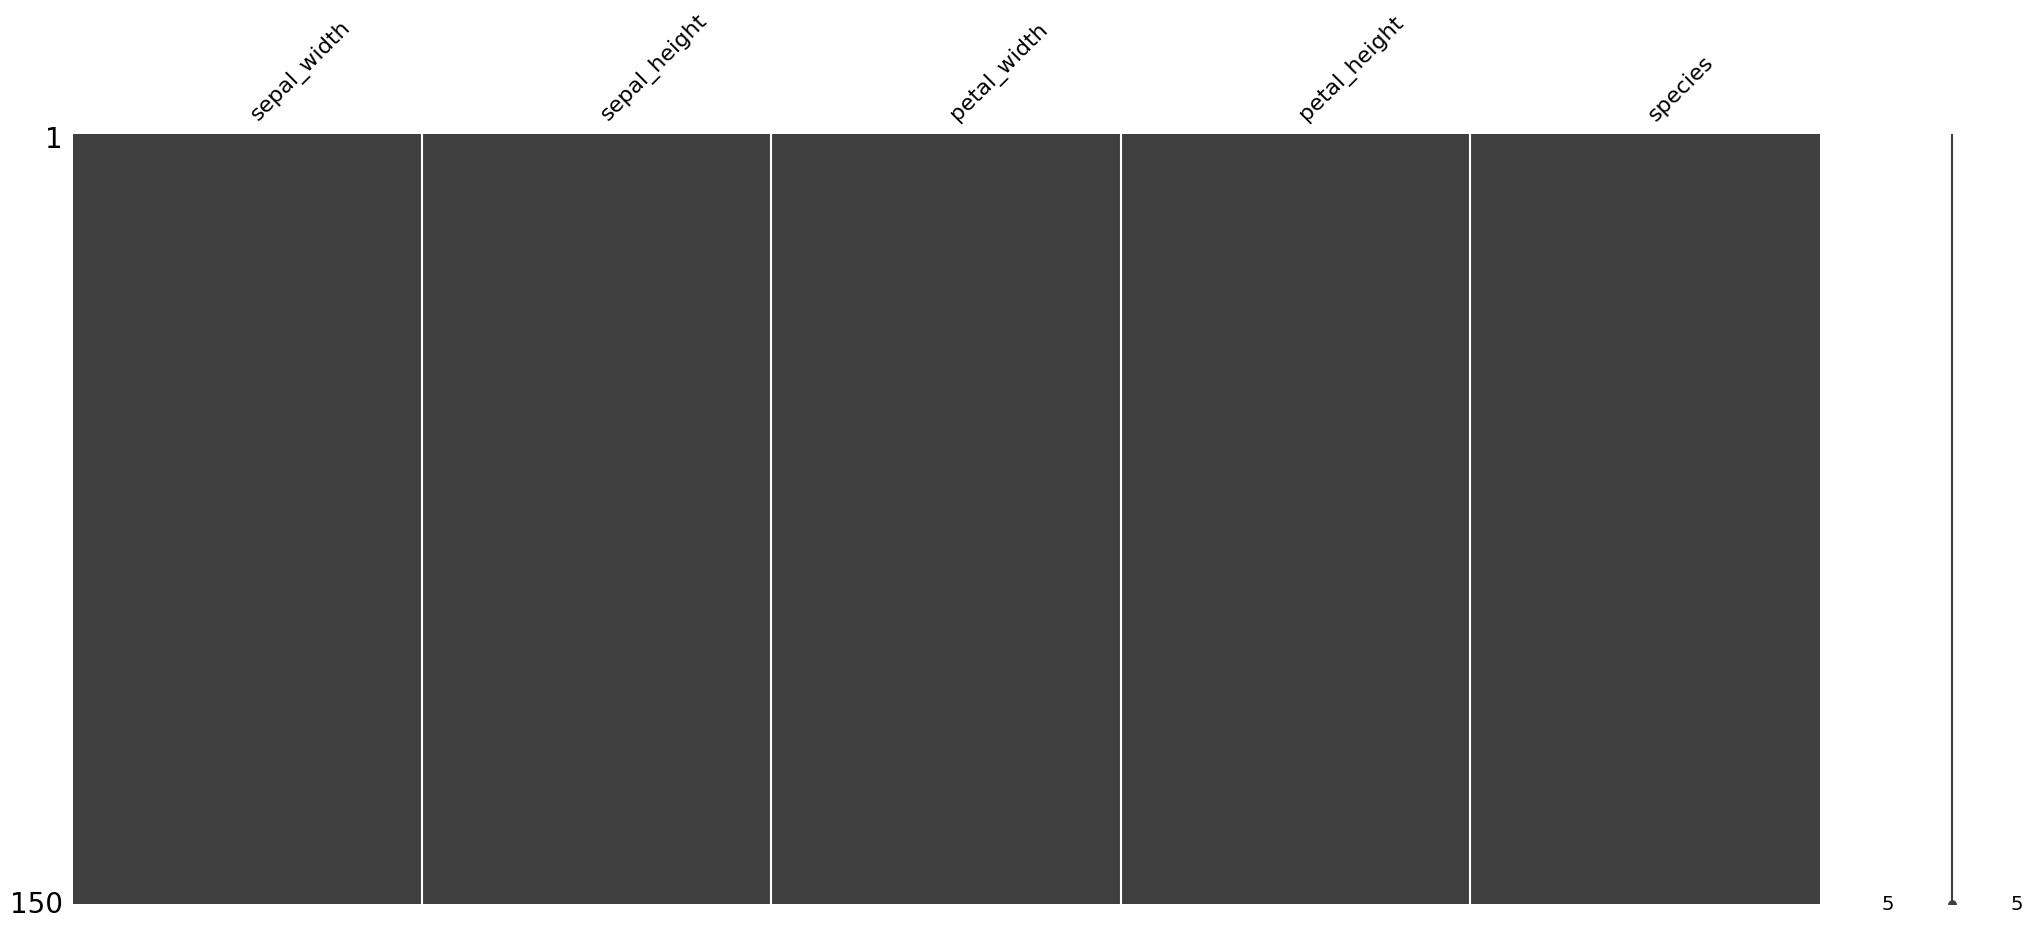

In [202]:
import missingno as msno

msno.matrix(df)